In [1]:
from tqdm import tqdm
import scispacy
import spacy
import json
import re
import nltk
from operator import itemgetter

In [2]:
with open("../cleaned_data_json/sample.json") as f:
    data=json.load(f)

In [3]:
#Merged abstract and body-text of a paper as doc
text_data = [dt["abstract"].lower() for dt in data["text"] if dt['abstract']]

In [4]:
#Took 2000 Research Papers for modelling
print("TOTAL DOCS : ", len(text_data))

TOTAL DOCS :  1774


In [5]:
import unicodedata
def remove_accent_chars(text):
    text = unicodedata.normalize('NFKD',text).encode('ascii','ignore').decode('utf-8','ignore')
    return text

In [6]:
def remove_special_characters(text, remove_digits=False):
    """This takes text as input and then finds whether each character is not a-z A-Z 0-9 and replaces them with nothing """
    pattern = r'[^a-zA-z\s]' if remove_digits else r'[^0-9a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

In [7]:
stop_words_found = "preprint license copyright author/funder word count text https doi figure holder data cases medrxiv biorxiv made time may study high total population number granted used using also international fig cc-by-nc-nd rights reserved peer-reviewed et al. medrxiv copyright auther/funder copyright copyrights pre print preprint = fig fig. figure "
stop_words_found = stop_words_found.split() #Best way to keep stop words
stop_words_found.extend(["abstract","perpetuity","authorfunder","license"])

In [8]:
def cleaner(doc):
    return " ".join(map(str.lower,(map(str,([token.lemma_ for token in doc if not token.is_stop and not token.is_space and not token.is_punct and not token.like_url and not token.like_email and token.text not in stop_words_found])))))
nlp = spacy.load("en_core_sci_sm", disable = ['tagger', 'parser','ner'], max_length=2000000)
nlp.add_pipe(cleaner,name="cleaner",first=True)
nlp.add_pipe(remove_accent_chars,name='accent_char_removal',after='cleaner')
nlp.add_pipe(remove_special_characters,name='remove_special_char',after='accent_char_removal')

In [9]:
text_data_cleaned = list(nlp.pipe(text_data))

In [10]:
text_data_cleaned[0]

'194 22 5168 23 24 25 reuse allow permission 27 positive strand rna genome picornaviruses comprise single large open read 28 frame flank 5 3 untranslated region utrs footandmouth disease virus fmdv 29 unusually large 5 utr 13 kb contain structural domain include 30 internal ribosome entry site ires facilitate initiation translation cisacting 31 replication element cre characterise structure 5 terminal 360 nucleotide 32 stemloop variable length polyctract approximately 100 200 nucleotide series 33 tandemly repeat pseudoknots pk investigate structure pk 34 selective 2 hydroxyl acetylation analyse primer extension shape analysis 35 determine contribution genome replication mutation deletion experiment 36 shape mutation experiment confirm importance previously predict pk 37 structure function deletion experiment show pk essential 38 replication provide genome competitive advantage 39 replicons fulllength genome lack pk replication competent infectious 40 virus rescue genome contain pk copy

In [14]:
"""Getting Top n-grams from corpus"""
def flatten_corpus(corpus):
    return " ".join([d.strip() for d in corpus])

def compute_ngrams(sequence, n):
    return list(zip(*(sequence[index:] for index in range(n))))

In [15]:
def get_top_n_grams(corpus,ngram_val=1,limit=10):
    text_data_flatten = flatten_corpus(corpus)
    tokens = [token.text for token in nlp.tokenizer(text_data_flatten)]
    ngrams = compute_ngrams(tokens, ngram_val)
    ngrams_freq_dist = nltk.FreqDist(ngrams)
    sorted_ngrams_fd = sorted(ngrams_freq_dist.items(),key=itemgetter(1), reverse=True)
    sorted_ngrams = sorted_ngrams_fd[0:limit]
    sorted_ngrams = [(' '.join(text), freq) for text, freq in sorted_ngrams]
    return sorted_ngrams

In [16]:
get_top_n_grams(text_data_cleaned,ngram_val=2,limit=20)

[('95 ci', 139),
 ('public health', 131),
 ('reuse allow', 128),
 ('allow permission', 128),
 ('acute respiratory', 107),
 ('respiratory syndrome', 105),
 ('severe acute', 87),
 ('novel coronavirus', 86),
 ('infectious disease', 79),
 ('covid19 pandemic', 74),
 ('covid19 patient', 73),
 ('immune response', 72),
 ('coronavirus disease', 72),
 ('rna virus', 68),
 ('s protein', 67),
 ('amino acid', 67),
 ('40 available', 66),
 ('viral infection', 62),
 ('t cell', 60),
 ('influenza virus', 59)]

In [17]:
get_top_n_grams(text_data_cleaned,ngram_val=3,limit=20)

[('reuse allow permission', 128),
 ('severe acute respiratory', 82),
 ('acute respiratory syndrome', 72),
 ('allow permission display', 55),
 ('coronavirus disease 2019', 52),
 ('respiratory syndrome coronavirus', 50),
 ('40 available display', 46),
 ('middle east respiratory', 29),
 ('ccby 40 available', 28),
 ('east respiratory syndrome', 27),
 ('coronavirus 2 sarscov2', 25),
 ('polymerase chain reaction', 24),
 ('respiratory syndrome sars', 23),
 ('respiratory tract infection', 23),
 ('intensive care unit', 22),
 ('novel coronavirus 2019ncov', 21),
 ('disease 2019 covid19', 21),
 ('public health emergency', 21),
 ('syndrome coronavirus 2', 21),
 ('novel coronavirus sarscov2', 20)]

In [18]:
text_data_flatten = flatten_corpus(text_data_cleaned)
search = '95 ci'
print(len(search))

5


In [19]:
for i in range(0,len(text_data_flatten),5):
    if text_data_flatten[i:i+5] == search:
        print(text_data_flatten[i-20:i+28])

8 95 ci 144 214 346 95 ci 281 417 scenario asymp
5 ci 12 21and hr 23 95 ci 16 32 respectively arr
5 95 ci 12 19 hr 18 95 ci 13 25 respectively dem
vely dementia hr 12 95 ci 09 18 hr 18 95 ci 11 2
3 95 ci 10 17 hr 17 95 ci 12 25 respectively dia
vely diabetes hr 15 95 ci 13 19 hr 16 95 ci 11 2
4 95 ci 12 26 hr 16 95 ci 12 21 respectively cop
i 14 25 death hr 11 95 ci 07 17 previous use ace
sessment score sofa 95 ci 1374 2860 p  0001 whit
d 21 r0 estimate 44 95 ci 39 49 generalize growt
usehold contact 136 95 ci 47 295 nonhousehold fa
cvd hypertension 44 95 ci 264 747 37 95 ci 222 5
 saturation  88 699 95 ci 45 110 ddimer2500 69 9
2 admission hr 0704 95 ci 0546 0909 1 decrease p
uctive drop 232 076 95 ci 066 086 infect case es
p0012 ct value 0158 95 ci 0025 0987 p0048 pii 19
ial hospital hr 073 95 ci 054 099 illness hr 066
io low midlands 111 95 ci 107 114 high north eas
n difference 424 gl 95 ci 620 228 p0001 associat
eral involvement 84 95 ci 081 088 commonly invol
tial ct examination 

In [20]:
"""POINTWISE MUTUAL INFORMATION"""

'POINTWISE MUTUAL INFORMATION'

In [21]:
from nltk.collocations import BigramCollocationFinder
from nltk.collocations import BigramAssocMeasures

In [22]:
tokens = [token.text for token in nlp.tokenizer(text_data_flatten)]
finder = BigramCollocationFinder.from_documents([tokens])

In [23]:
bigram_measures = BigramAssocMeasures()
finder.nbest(bigram_measures.raw_freq, 10)

[('95', 'ci'),
 ('public', 'health'),
 ('allow', 'permission'),
 ('reuse', 'allow'),
 ('acute', 'respiratory'),
 ('respiratory', 'syndrome'),
 ('severe', 'acute'),
 ('novel', 'coronavirus'),
 ('infectious', 'disease'),
 ('covid19', 'pandemic')]

In [24]:
finder.nbest(bigram_measures.pmi, 10)

[('00049', '254'),
 ('0042', '0078'),
 ('0067', '0105'),
 ('0069', '0707'),
 ('0076', '0473'),
 ('0079', 's1a'),
 ('0102', '0982'),
 ('0165', '24279505520'),
 ('0167', '5877950950'),
 ('0176', '3098')]

In [25]:
from nltk.collocations import TrigramCollocationFinder
from nltk.collocations import TrigramAssocMeasures

In [26]:
finder = TrigramCollocationFinder.from_documents([tokens])
trigram_measures = TrigramAssocMeasures()
finder.nbest(trigram_measures.pmi, 10)

[('0069', '0707', 'p0011'),
 ('05ml', 'intra', '025ml'),
 ('0987', 'p0048', 'pii'),
 ('11525', '24053', '240167'),
 ('1187', '3079', 'p0008'),
 ('1206', '4580', 'p0012'),
 ('1279', '92927', 'p0029'),
 ('1354', '648', '2091'),
 ('13[12', 'inappetence', '11[10'),
 ('143173', '647', '112173')]

In [27]:
from gensim import corpora,models

In [28]:
tokenizer = spacy.load("en_core_sci_sm")
def get_tfidf_key_phrases(text_data_cleaned,top_n=10):
    text_noun_phrases = []
    for tdc in text_data_cleaned:
        noun_phrase = []
        for np in tokenizer(tdc).noun_chunks:
            noun_phrase.append(np.text)
        text_noun_phrases.append(noun_phrase)
    dictionary = corpora.Dictionary(text_noun_phrases)
    corpus = [dictionary.doc2bow(chunk) for chunk in text_noun_phrases]
    tfidf = models.TfidfModel(corpus)
    corpus_tfidf = tfidf[corpus]
    weighted_phrases = {dictionary.get(idx): value for doc in corpus_tfidf for idx, value in doc}
    weighted_phrases = sorted(weighted_phrases.items(),key=itemgetter(1), reverse=True)
    weighted_phrases = [(term, round(wt, 3)) for term, wt in weighted_phrases]
    return weighted_phrases[:top_n]

In [29]:
get_tfidf_key_phrases(text_data_cleaned, top_n=100)

[('pulmonary sample individual', 1.0),
 ('word', 1.0),
 ('covid19 sarscov2', 1.0),
 ('reliable estimate covid19 mortality crucial aid control strategy assess effectiveness intervention',
  1.0),
 ('motivation dna metabarcoding com', 1.0),
 ('severe acute respiratory syndrome coronavirus 2 sarscov2 disease', 1.0),
 ('reuse allow', 0.925),
 ('science', 0.925),
 ('pandemic spread', 0.734),
 ('rok bimodal distribution high morbidity', 0.707),
 ('standard gaussian distribution peak morbidity', 0.707),
 ('44 95 ci 39 49 generalize growth model', 0.707),
 ('estimate reproduction', 0.707),
 ('responsible current sarscov2', 0.707),
 ('zoonotic coronavirus cov infection', 0.707),
 ('1 inflammatory storm', 0.707),
 ('monocyte centric immune interaction 2 reveal singlecell analysis', 0.707),
 ('covid19 outbreak', 0.707),
 ('globally risk infection', 0.707),
 ('100 country report', 0.707),
 ('rapid global spread coronavirus disease covid19 unprecedented outbreak',
  0.707),
 ('1 precipitation seaso

In [30]:
import gensim

In [31]:
text_tokens = []
for doc in text_data_cleaned:
    tokens = []
    for t in tokenizer(doc):
        if len(t.text) == 1 or len(list(set(t.text))) == 1:
            pass
        else:
            tokens.append(t.text)
    text_tokens.append(tokens)

In [32]:
print(text_tokens[:2])

[['194', '5168', '23', '24', '25', 'reuse', 'allow', 'permission', '27', 'positive', 'strand', 'rna', 'genome', 'picornaviruses', 'comprise', 'single', 'large', 'open', 'read', '28', 'frame', 'flank', 'untranslated', 'region', 'utrs', 'footandmouth', 'disease', 'virus', 'fmdv', '29', 'unusually', 'large', 'utr', '13', 'kb', 'contain', 'structural', 'domain', 'include', '30', 'internal', 'ribosome', 'entry', 'site', 'ires', 'facilitate', 'initiation', 'translation', 'cisacting', '31', 'replication', 'element', 'cre', 'characterise', 'structure', 'terminal', '360', 'nucleotide', '32', 'stemloop', 'variable', 'length', 'polyctract', 'approximately', '100', '200', 'nucleotide', 'series', 'tandemly', 'repeat', 'pseudoknots', 'pk', 'investigate', 'structure', 'pk', '34', 'selective', 'hydroxyl', 'acetylation', 'analyse', 'primer', 'extension', 'shape', 'analysis', '35', 'determine', 'contribution', 'genome', 'replication', 'mutation', 'deletion', 'experiment', '36', 'shape', 'mutation', 'exp

In [33]:
bigram = gensim.models.Phrases(text_tokens, min_count=20, threshold=50,delimiter=b'_') # higher threshold fewer phrases.
bigram_model = gensim.models.phrases.Phraser(bigram)

In [34]:
norm_corpus_bigrams = [bigram_model[doc] for doc in text_tokens]

In [35]:
dictionary = gensim.corpora.Dictionary(norm_corpus_bigrams)
print('Sample word to number mappings:', list(dictionary.items())[:15])
print('Total Vocabulary Size:', len(dictionary))

Sample word to number mappings: [(0, '100'), (1, '13'), (2, '194'), (3, '200'), (4, '23'), (5, '24'), (6, '25'), (7, '27'), (8, '28'), (9, '29'), (10, '30'), (11, '31'), (12, '32'), (13, '34'), (14, '35')]
Total Vocabulary Size: 15378


In [36]:
dictionary.filter_extremes(no_below=3, no_above=0.9)

In [37]:
print('Total Vocabulary Size:', len(dictionary))

Total Vocabulary Size: 4163


In [38]:
bow_corpus = [dictionary.doc2bow(text) for text in norm_corpus_bigrams]

In [39]:
print(bow_corpus[1][:50])
print([(dictionary[idx],frequency) for idx,frequency in bow_corpus[1][:50]])

[(0, 1), (24, 2), (53, 1), (59, 1), (72, 1), (89, 1), (105, 1), (106, 2), (107, 1), (108, 1), (109, 1), (110, 2), (111, 1), (112, 1), (113, 1), (114, 1), (115, 1), (116, 1), (117, 1), (118, 1), (119, 1), (120, 1), (121, 1), (122, 1), (123, 1), (124, 1), (125, 1), (126, 2), (127, 1), (128, 1), (129, 1), (130, 1), (131, 1), (132, 1), (133, 1), (134, 2), (135, 1), (136, 1), (137, 1), (138, 1), (139, 1), (140, 1), (141, 1), (142, 1), (143, 1), (144, 1), (145, 1), (146, 1), (147, 1), (148, 1)]
[('100', 1), ('analysis', 2), ('genome', 1), ('investigate', 1), ('presence', 1), ('show', 1), ('40_available', 1), ('affect', 2), ('assess', 1), ('available', 1), ('avoid', 1), ('base', 2), ('cause', 1), ('channel', 1), ('clearly', 1), ('concerted', 1), ('consider', 1), ('continue', 1), ('coronavirus', 1), ('country', 1), ('currently', 1), ('display', 1), ('dissemination', 1), ('distress', 1), ('economy', 1), ('effort', 1), ('enormous', 1), ('epidemic', 2), ('examine', 1), ('exponentially', 1), ('fin

In [40]:
print("Total number of papers",len(bow_corpus))

Total number of papers 1774


In [41]:
TOTAL_TOPICS = 10
lda_model = gensim.models.LdaModel(corpus=bow_corpus, id2word=dictionary,chunksize=1740, alpha='auto',eta='auto', random_state=42,
                                    iterations=500, num_topics=TOTAL_TOPICS,passes=20, eval_every=None)

In [42]:
for topic_id, topic in lda_model.print_topics(num_topics=10, num_words=20):
    print('Topic #'+str(topic_id+1)+':')
    print(topic)
    print()

Topic #1:
0.022*"test" + 0.020*"antibody" + 0.007*"serum" + 0.006*"day" + 0.006*"positive" + 0.006*"sarscov2" + 0.006*"clinical" + 0.006*"result" + 0.006*"method" + 0.005*"igg" + 0.005*"mouse" + 0.005*"early" + 0.005*"infection" + 0.004*"resistance" + 0.004*"isolation" + 0.004*"development" + 0.004*"level" + 0.004*"igm" + 0.004*"sample" + 0.004*"concentration"

Topic #2:
0.043*"cell" + 0.012*"infection" + 0.009*"bat" + 0.008*"acid" + 0.008*"ifn" + 0.008*"plasmid" + 0.006*"antiviral" + 0.006*"viral" + 0.006*"activity" + 0.006*"function" + 0.005*"receptor" + 0.005*"activation" + 0.005*"jev" + 0.005*"sialic" + 0.005*"mouse" + 0.004*"fusion" + 0.004*"influenza" + 0.004*"response" + 0.004*"epithelial_cell" + 0.004*"express"

Topic #3:
0.032*"sample" + 0.023*"assay" + 0.020*"detect" + 0.019*"detection" + 0.015*"method" + 0.013*"test" + 0.011*"pcr" + 0.010*"diagnostic" + 0.009*"rtpcr" + 0.009*"virus" + 0.009*"pathogen" + 0.007*"reaction" + 0.007*"develope" + 0.007*"sequence" + 0.007*"sensitiv

In [43]:
import numpy as np
topics_coherences = lda_model.top_topics(bow_corpus,topn=20)
avg_coherence_score = np.mean([score[1] for score in topics_coherences])
print("avg coherence score: ",avg_coherence_score)

avg coherence score:  -5.950038865668631


In [44]:
topics_with_wts = [item[0] for item in topics_coherences]
print('LDA Topics with Weights')
print('='*50)
for idx, topic in enumerate(topics_with_wts):
    print('Topic #'+str(idx+1)+':')
    print([(term, round(wt, 3)) for wt, term in topic])
    print()

LDA Topics with Weights
Topic #1:
[('virus', 0.019), ('protein', 0.015), ('cell', 0.014), ('viral', 0.011), ('sequence', 0.009), ('rna', 0.009), ('human', 0.008), ('sarscov2', 0.007), ('gene', 0.007), ('host', 0.006), ('infection', 0.006), ('coronavirus', 0.006), ('genome', 0.005), ('mutation', 0.005), ('identify', 0.005), ('strain', 0.005), ('target', 0.005), ('bind', 0.005), ('result', 0.005), ('analysis', 0.005)]

Topic #2:
[('model', 0.022), ('covid19', 0.018), ('epidemic', 0.012), ('outbreak', 0.011), ('rate', 0.009), ('country', 0.009), ('estimate', 0.008), ('spread', 0.008), ('infection', 0.008), ('disease', 0.008), ('pandemic', 0.007), ('transmission', 0.006), ('china', 0.006), ('result', 0.006), ('report', 0.006), ('measure', 0.006), ('death', 0.005), ('infect', 0.005), ('individual', 0.005), ('case', 0.005)]

Topic #3:
[('virus', 0.01), ('disease', 0.01), ('transmission', 0.009), ('bat', 0.009), ('species', 0.007), ('pathogen', 0.006), ('host', 0.006), ('new', 0.006), ('infec

In [45]:
print('LDA Topics without Weights')
print('='*50)
for idx, topic in enumerate(topics_with_wts):
    print('Topic #'+str(idx+1)+':')
    print([term for wt, term in topic])
    print()

LDA Topics without Weights
Topic #1:
['virus', 'protein', 'cell', 'viral', 'sequence', 'rna', 'human', 'sarscov2', 'gene', 'host', 'infection', 'coronavirus', 'genome', 'mutation', 'identify', 'strain', 'target', 'bind', 'result', 'analysis']

Topic #2:
['model', 'covid19', 'epidemic', 'outbreak', 'rate', 'country', 'estimate', 'spread', 'infection', 'disease', 'pandemic', 'transmission', 'china', 'result', 'report', 'measure', 'death', 'infect', 'individual', 'case']

Topic #3:
['virus', 'disease', 'transmission', 'bat', 'species', 'pathogen', 'host', 'new', 'infection', 'human', 'sarscov2', 'health', 'year', 'animal', 'risk', 'result', 'emergence', 'coronavirus', 'factor', 'method']

Topic #4:
['patient', 'covid19', 'infection', 'clinical', 'disease', 'treatment', 'sarscov2', 'severe', 'age', '95_ci', 'respiratory', 'child', 'result', 'include', 'risk', 'lung', 'pneumonia', 'coronavirus', 'study', 'group']

Topic #5:
['sample', 'assay', 'detect', 'detection', 'method', 'test', 'pcr',

In [46]:
"""MALLET"""

'MALLET'

In [63]:
MALLET_PATH = '../mallet-2.0.8/bin/mallet'
lda_mallet = gensim.models.wrappers.LdaMallet(mallet_path=MALLET_PATH,corpus=bow_corpus,num_topics=13,id2word=dictionary,iterations=500, workers=16)

In [64]:
topics = [[(term, round(wt, 3))
                for term, wt in lda_mallet.show_topic(n, topn=20)]
                   for n in range(0, TOTAL_TOPICS)]

In [65]:
for idx, topic in enumerate(topics):
    print('Topic #'+str(idx+1)+':')
    print([term for term, wt in topic])
    print()

Topic #1:
['sarscov2', 'antibody', 'coronavirus', 'vaccine', 'drug', 'sarscov', '2019ncov', 'potential', 'development', 'sars', 'target', 'bind', 'antiviral', 'ace2', 'result', 'inhibitor', 'epitope', 'show', 'identify', 'treatment']

Topic #2:
['respiratory', 'assay', '10', '30', 'type', 'sample', 'detect', '20', 'child', '15', '25', '16', '24', '21', '50', '13', '28', '27', '23', '35']

Topic #3:
['disease', 'report', 'study', 'health', 'present', 'review', 'outbreak', 'public_health', 'research', 'include', 'affect', 'de', 'coronavirus', 'database', 'emerge', 'analysis', 'describe', 'relate', 'case', 'surveillance']

Topic #4:
['infection', 'risk', 'age', 'high', 'level', 'group', 'factor', 'low', '95_ci', 'rate', 'death', 'year', 'increase', 'result', 'associate', 'significantly', 'find', 'mortality', 'incidence', 'area']

Topic #5:
['strain', 'analysis', 'virus', 'isolate', 'show', 'find', 'major', 'gene', 'animal', 'infection', 'determine', 'identify', 'pattern', 'loss', 'recombi

In [51]:
cv_coherence_model_lda = gensim.models.CoherenceModel(model=lda_mallet,corpus=bow_corpus,texts=norm_corpus_bigrams,dictionary=dictionary,coherence='c_v')
avg_coherence_cv = cv_coherence_model_lda.get_coherence()
umass_coherence_model_lda = gensim.models.CoherenceModel(model=lda_mallet,corpus=bow_corpus,texts=norm_corpus_bigrams,dictionary=dictionary,coherence='u_mass')
avg_coherence_umass = umass_coherence_model_lda.get_coherence()

In [52]:
print('Avg. Coherence Score (Cv):', avg_coherence_cv)
print('Avg. Coherence Score (UMass):', avg_coherence_umass)
# print('Model Perplexity:', perplexity) 

Avg. Coherence Score (Cv): 0.5032596165679364
Avg. Coherence Score (UMass): -1.804618613582789


In [53]:
from tqdm import tqdm
def topic_model_coherence_generator(corpus,text_dictionary,start_topic_count=2,end_topic_count=20,step=1,cpus=1):
    model = []
    model_summary = []
    for topic_nums in tqdm(range(start_topic_count,end_topic_count+1,step)):
        lda_mallet = gensim.models.wrappers.LdaMallet(mallet_path=MALLET_PATH,corpus=bow_corpus,
                                                      num_topics=topic_nums,id2word=dictionary,iterations=500, workers=16)
        cv_coherence_model_lda = gensim.models.CoherenceModel(model=lda_mallet,corpus=bow_corpus,texts=norm_corpus_bigrams,
                                                              dictionary=dictionary,coherence='c_v')
        avg_coherence_cv = cv_coherence_model_lda.get_coherence()
        
        umass_coherence_model_lda = gensim.models.CoherenceModel(model=lda_mallet,corpus=bow_corpus,texts=norm_corpus_bigrams,
                                                                 dictionary=dictionary,coherence='u_mass')
        avg_coherence_umass = umass_coherence_model_lda.get_coherence()
        
        model_summary.append([topic_nums,avg_coherence_cv,avg_coherence_umass])
        model.append(lda_mallet)
    return model,model_summary

In [54]:
lda_models,lda_model_results = topic_model_coherence_generator(bow_corpus,dictionary,start_topic_count=2,end_topic_count=20,step=1,cpus=1)

100%|██████████| 19/19 [07:04<00:00, 22.35s/it]


In [56]:
import pandas as pd
df = pd.DataFrame(lda_model_results,columns=['Topics','CV_Score','UMass_Score'])

In [57]:
df = df.set_index('Topics')

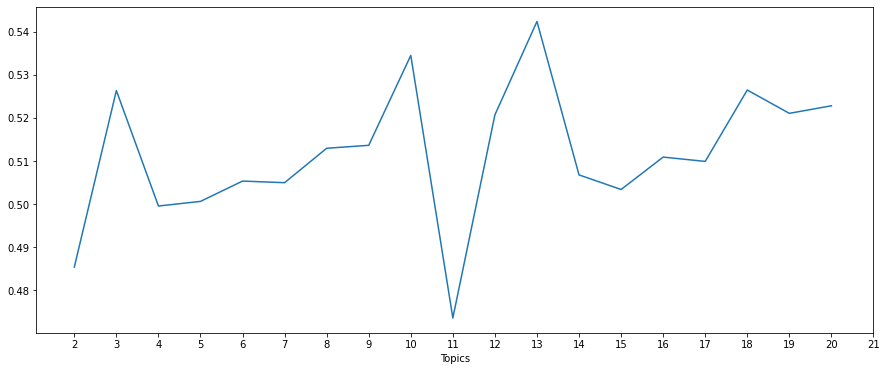

In [62]:
df['CV_Score'].plot(figsize=(15,6),xticks=range(2,22))